<a href="https://colab.research.google.com/github/Tanushreep698/OIBSIP/blob/main/project4level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Twitter_Data.csv to Twitter_Data (1).csv
                                          clean_text  Sentiment
0  when modi promised “minimum government maximum...         -1
1  talk all the nonsense and continue all the dra...          0
2  what did just say vote for modi  welcome bjp t...          1
3  asking his supporters prefix chowkidar their n...          1
4  answer who among these the most powerful world...          1

Missing values:
 clean_text    4
Sentiment     0
dtype: int64

Sentiment counts:
 Sentiment
 1    72250
 0    55213
-1    35510
Name: count, dtype: int64


/tmp/ipython-input-1989626172.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


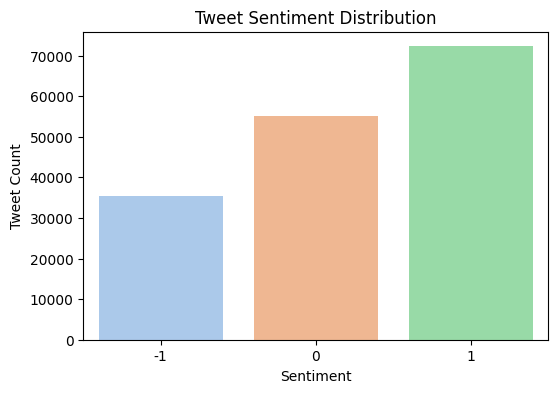


'Date' column not found. Skipping time series analysis.


In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Upload Twitter Dataset
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv(next(iter(uploaded)))

# Rename the 'category' column to 'Sentiment'
df = df.rename(columns={'category': 'Sentiment'})

# Drop rows with missing sentiment values
df.dropna(subset=['Sentiment'], inplace=True)

# Convert the Sentiment column to integer type
df['Sentiment'] = df['Sentiment'].astype(int)


# 👀 Step 3: Inspect the Data
print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nSentiment counts:\n", df['Sentiment'].value_counts())

# 📊 Step 4: Bar Chart – Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

# 📈 Step 5: Line Chart – Sentiment Over Time
# Assuming a 'Date' column exists in the dataset for time series analysis.
# If there is no 'Date' column, this step will raise a KeyError.
# You may need to add or generate a date column based on your data.
try:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.date
    sentiment_over_time = df.groupby(['Day', 'Sentiment']).size().unstack().fillna(0)

    plt.figure(figsize=(10,6))
    sentiment_over_time.plot(kind='line', marker='o')
    plt.title('Sentiment Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
except KeyError:
    print("\n'Date' column not found. Skipping time series analysis.")